# CDIP Buoy Tracks: Ocean Parcels

Import relevant libraries

In [27]:
%matplotlib inline
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, plotTrajectoriesFile
import numpy as np
import math
import xarray as xr
from datetime import timedelta,datetime
from operator import attrgetter
from plot_buoy_tracks import plot_buoy_tracks

## Read in data from NetCDF files

First, define the names of the files containing the zonal (U) and meridional (V) velocities. 

In [28]:
filenames = {'U': "hycomm_U.nc",
             'V': "hycomm_V.nc"}

In [29]:
url='http://syntool.cdip.ucsd.edu/thredds/dodsC/FMRC/IFREMER_GFS_WAVE_MODEL_ATNW_10M/IFREMER_GFS_WAVE_MODEL_ATNW_10M_best.ncd'


Then, define a dictionary of the variables (`U` and `V`) and dimensions (`lon`, `lat` and `time`; note that in this case there is no `depth` because the GlobCurrent data is only for the surface of the ocean)

In [30]:
variables = {'U': 'water_u',
             'V': 'water_v'}
dimensions = {'lat': 'lat',
              'lon': 'lon',
              'time': 'time'}

Finally, read in the fieldset using the `FieldSet.from_netcdf` function with the above-defined `filenames`, `variables` and `dimensions`

In [32]:
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions)

Now define a `ParticleSet`, in this case with 5 particle starting on a line between (28E, 33S) and (30E, 33S) using the `ParticleSet.from_line` constructor method

In [33]:
pset = ParticleSet.from_line(fieldset=fieldset, pclass=JITParticle,
                             size=5,            # releasing 5 particles
                             start=(267.495, 29.08),   # releasing on a line: the start longitude and latitude
                             finish=(268, 29.08))  # releasing on a line: the end longitude and latitude

And finally execute the `ParticleSet` for 6 days using 4th order Runge-Kutta

In [34]:
ofname = "Output.nc"
output_file = pset.ParticleFile(name=ofname, outputdt=timedelta(hours=3))
pset.execute(AdvectionRK4,
             runtime=timedelta(days=6),
             dt=timedelta(minutes=5),
             output_file=output_file)

INFO: Compiled ArrayJITParticleAdvectionRK4 ==> /tmp/parcels-1000/lib5e285bf012e4bb7c0bd6ff9e4135faf1_0.so


Now visualise this simulation using the `plotParticles` script again. Note you can plot the particles on top of one of the velocity fields using the `tracerfile`, `tracerfield`, etc keywords.

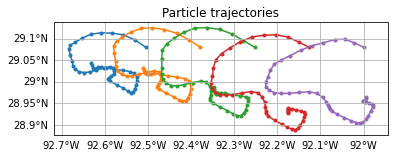

In [35]:
output_file.export()
plotTrajectoriesFile(ofname);

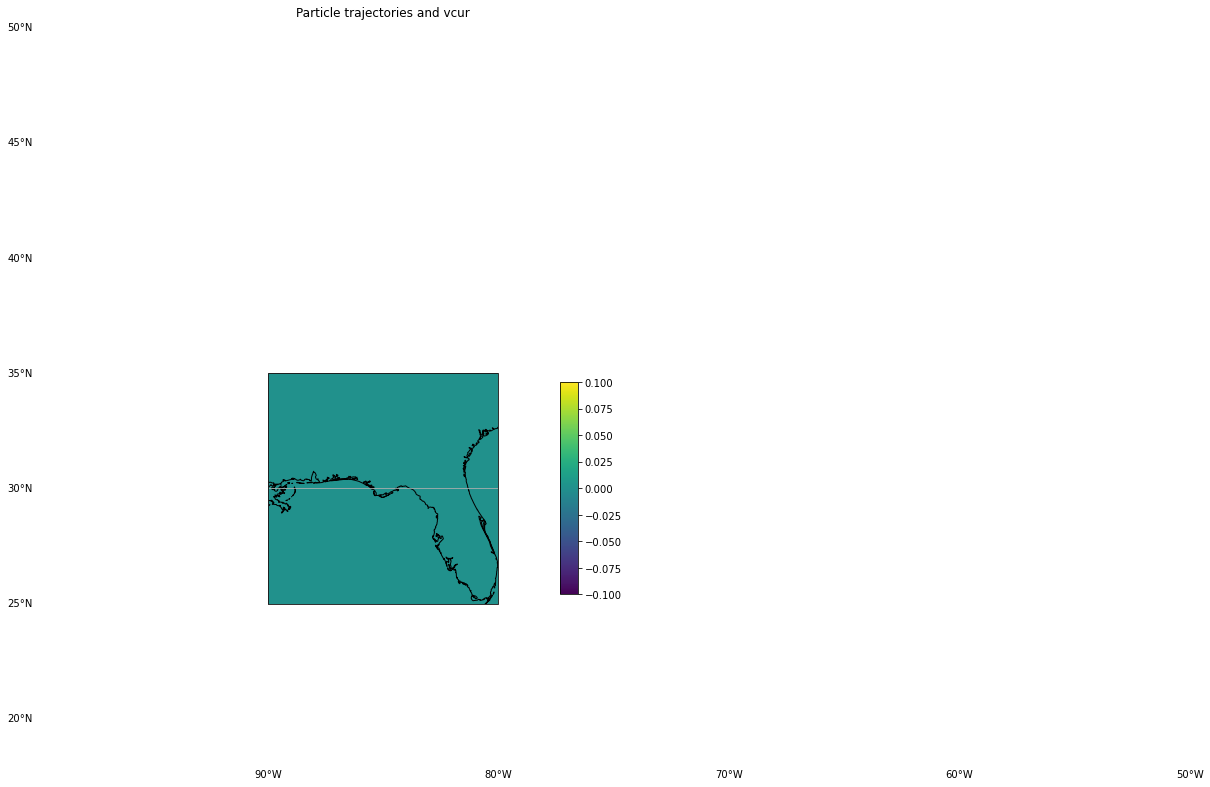

In [38]:
plot_buoy_tracks(ofname,
                    tracerfile='http://syntool.cdip.ucsd.edu/thredds/dodsC/raw/IFREMER_GFS_WAVE_MODEL/MARC_WW3-ATNW-10M_20220328T21Z.nc',
                     tracerlon='longitude',
                     tracerlat='latitude',
                     tracerfield='vcur');